In [1]:
print("SHAP")

SHAP


In [2]:
!pip install shap

In [3]:
# !pip install --upgrade shap

In [4]:
from tensorflow.keras.models import load_model
import cv2 as cv
import numpy as np

In [5]:
xp_images = ['/content/Bengin case (105).jpg',
            '/content/Malignant case (493).jpg',
            '/content/10 - Copy (3).png']
labels = ['Bengin','Malignant','Normal']
imgs_to_explain = []
for img_path in xp_images:
    img_arr = cv.imread(img_path)
    resize_img = cv.resize(img_arr,(224,224))

    imgs_to_explain.append(resize_img)

imgs_to_explain = np.array(imgs_to_explain)

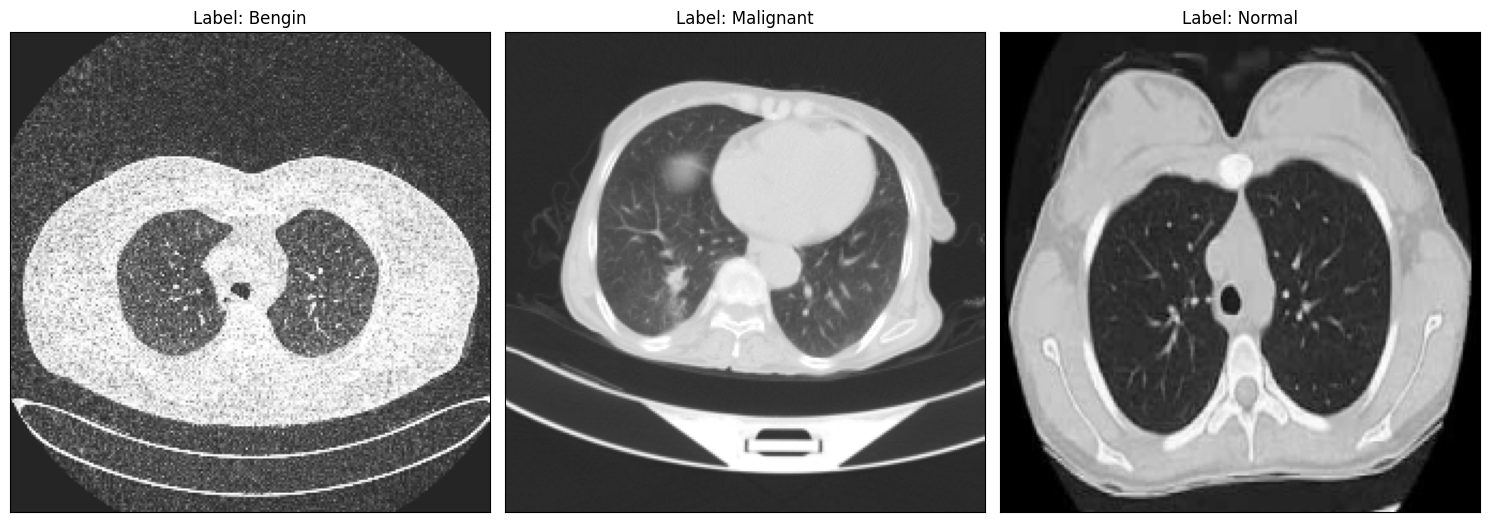

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
rows, cols = 1, 3
for i in range(rows * cols):

    plt.subplot(rows, cols, i + 1)


    plt.imshow(imgs_to_explain[i], cmap='gray')

    plt.title(label=f"Label: {labels[i]}")

    plt.xticks(ticks=[])
    plt.yticks(ticks=[])


plt.tight_layout()

plt.show()

In [7]:
# import json

# from tensorflow.keras.applications.vgg16 import preprocess_input

# import shap

# # load pre-trained model and choose two images to explain
# model = load_model('/content/drive/MyDrive/Lung_Cancer_data/model_d0.h5')


# def f(X):
#     tmp = X.copy()
#     preprocess_input(tmp)
#     return model(tmp)

# masker = shap.maskers.Image("inpaint_telea", imgs_to_explain[0].shape)

# # By default the Partition explainer is used for all  partition explainer
# explainer = shap.Explainer(f, masker, output_names=labels)


# shap_values = explainer(
#     imgs_to_explain, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:3]
# )


In [8]:
import json

from tensorflow.keras.applications.vgg16 import preprocess_input

import shap

# load pre-trained model and choose two images to explain
model = load_model('/content/drive/MyDrive/Lung_Cancer_data/model-D2.h5')


def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)

masker = shap.maskers.Image("inpaint_telea", imgs_to_explain[0].shape)

explainer = shap.Explainer(f, masker, output_names=labels)

shap_values = explainer(
    imgs_to_explain, max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:3]
)


  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [09:03<00:00, 131.29s/it]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [14:10, 283.46s/it]


In [9]:
print(shap_values.shape)

(3, 224, 224, 3, 3)


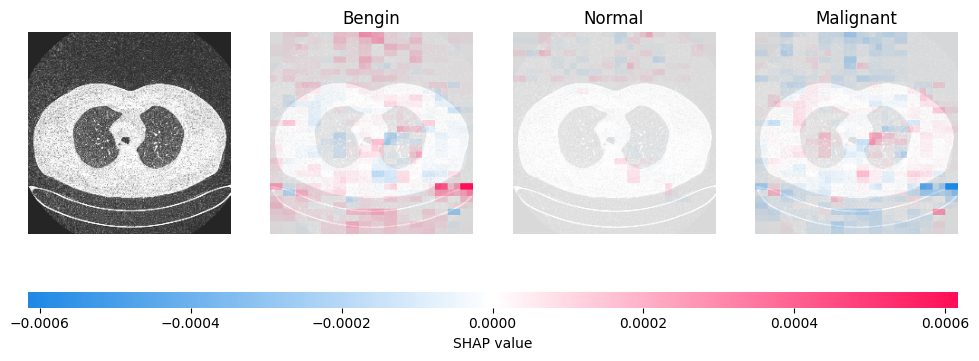

In [10]:
shap.image_plot(shap_values[0])

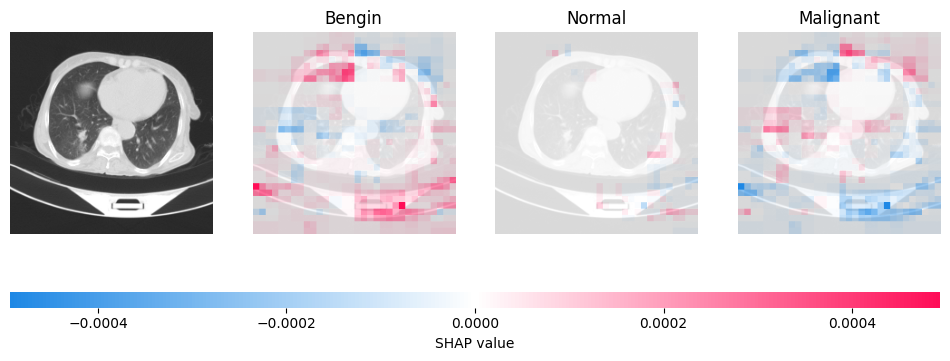

In [11]:
shap.image_plot(shap_values[1])

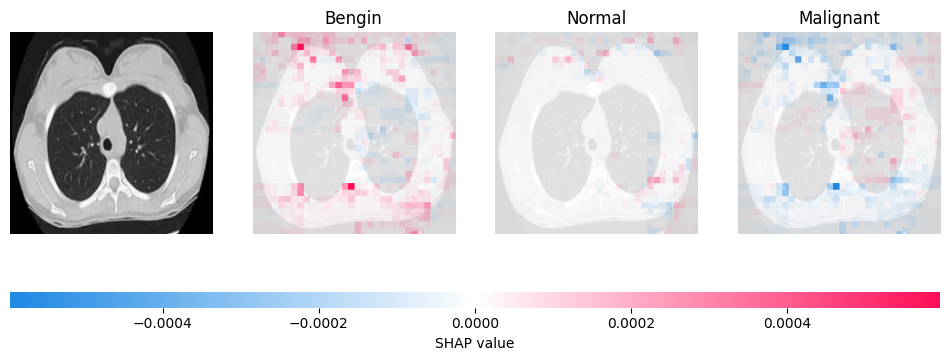

In [12]:
shap.image_plot(shap_values[2])

**Federated Model**

In [13]:
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.optimizers import Adam
# import shap

# # load pre-trained model and choose two images to explain
# model2 = load_model('/content/drive/MyDrive/Lung_Cancer_data/model_d0.h5')

# def f2(X):
#     tmp = X.copy()
#     preprocess_input(tmp)
#     return model2(tmp)

# masker2 = shap.maskers.Image("inpaint_telea", imgs_to_explain[0].shape)

# explainer2 = shap.Explainer(f2, masker, output_names=labels)

# shap_values2 = explainer2(
#     imgs_to_explain, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:3]
# )


  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [09:53<00:00, 151.43s/it]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [14:22, 287.63s/it]


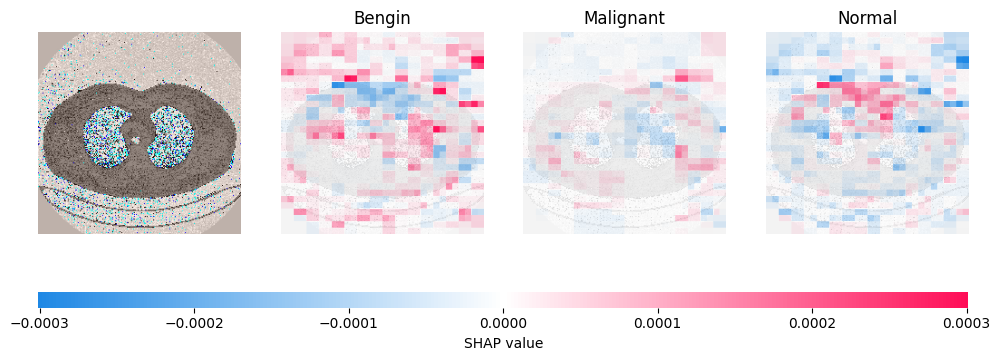

In [14]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
import shap

# Assuming imgs_to_explain is your image data
# Make sure it's a numpy array with correct shapes

# Load pre-trained model
model2 = load_model('/content/drive/MyDrive/Lung_Cancer_data/bioInfo_modelV1.h5')

# Preprocess images using VGG16 preprocess_input function
preprocessed_imgs = imgs_to_explain.copy()
for i in range(len(preprocessed_imgs)):
    preprocessed_imgs[i] = preprocess_input(preprocessed_imgs[i])

# Define the function to be explained
def f2(X):
    tmp = X.copy()
    return model2(tmp)

# Use an appropriate masker
masker2 = shap.maskers.Image("inpaint_telea", preprocessed_imgs[0].shape)

# Create an explainer
explainer2 = shap.Explainer(f2, masker2, output_names=labels)

# Explain the model predictions
shap_values2 = explainer2(
    preprocessed_imgs, max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:3]
)

# Plot the SHAP values
shap.image_plot(shap_values2[0])

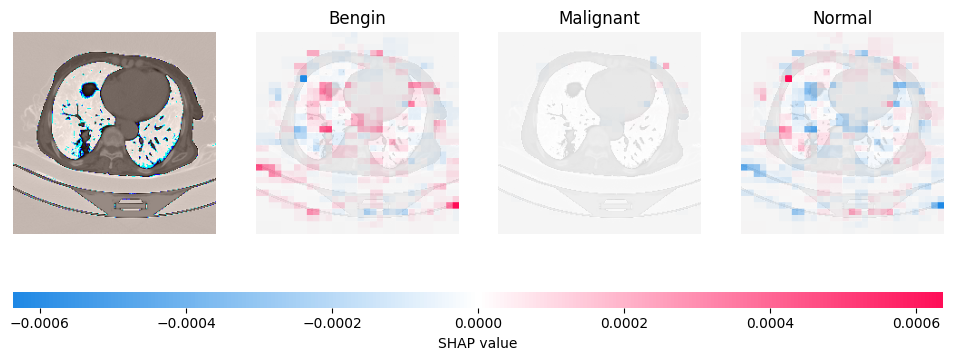

In [15]:
shap.image_plot(shap_values2[1])

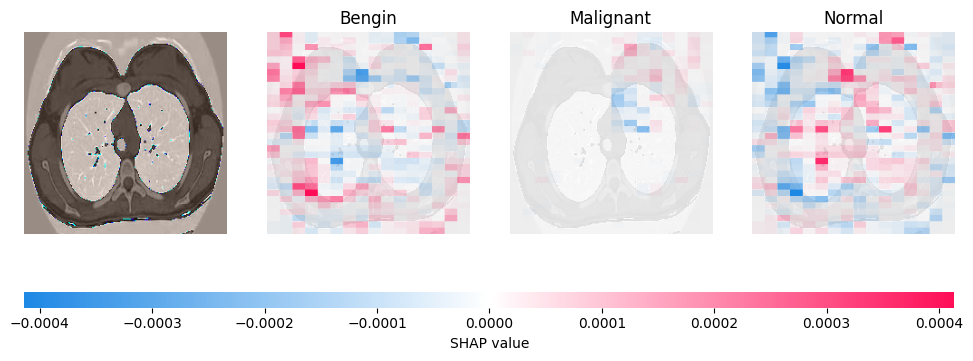

In [16]:
shap.image_plot(shap_values2[2])

In [17]:
# shap.image_plot(shap_values[0])

In [18]:
# model = load_model('/content/drive/MyDrive/Lung_Cancer_data/bioInfo_modelV1.h5')

In [19]:
# def data(path):
#   img_arr = cv.imread(path)
#   rs = cv.resize(img_arr, (224,224))
#   return rs

In [20]:
# input_data = data('/content/10 - Copy (3).png')
# input_data_with_batch = np.expand_dims(input_data, axis=0)
# predictions = model.predict(input_data_with_batch)
# pred = np.argmax(predictions, axis=-1)
# print(pred)

In [21]:
import os

In [ ]:
test_path = '/content/drive/MyDrive/Lung_Cancer_data/test'
X_test =[]
Y_test =[]
for img_class in os.listdir(test_path):
    for img in os.listdir(os.path.join(test_path, img_class)):
        img_path = os.path.join(test_path, img_class, img)
        img_arr = cv.imread(img_path)
        resize_img = cv.resize(img_arr,(224,224))
        X_test.append(resize_img)
        if img_class == 'BenginCases':
            Y_test.append(1)
        elif img_class == 'normal':
            Y_test.append(0)
        else:
            Y_test.append(2)

X_test = [value / 255.0 for value in X_test]
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
ff_model = load_model('/content/drive/MyDrive/Lung_Cancer_data/bioInfo_modelV1.h5')

In [ ]:
p2 = []
for data in X_test:
    input_data = data
    input_data_with_batch = np.expand_dims(input_data, axis=0)
    predictions = ff_model.predict(input_data_with_batch)
    pred = np.argmax(predictions, axis=-1)
    p2.append(pred)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, p2))